# **March Madness Analysis** 
## **Spring 2025 Data Science Project**
### Andrew Ross & Bode Ramsay

## Contributions

Andrew Ross
B: Helped idetify what columns we wanted to keep and then cut the dataset down to size
C: Helped come up with ideas for exploration and summary statistics
D, E: Created, trained, and tested logarithmic regression models for our 4 sets
G: Worked to clean up final product

Bode Ramsay
B: Helped implement some code to slim down the dataset and come up with variables to exclude
C: Implemented data visualization methods and show summary statistics
D, E: Gave the analysis and what the model was showing us
F: Did coding being visualization of the data
G: Helped come up with coherent, understandable explanations of what we did

## Introduction 

## Data Curation

Our data set is the [March Madness](https://www.kaggle.com/datasets/jonathanpilafas/2024-march-madness-statistical-analysis) data set which comes from the Kaggle user Jonathan Pilafas. It is well maintained and regularly updated. Data is clean and organized.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("DEV _ March Madness.csv")
df.shape

(8315, 151)

We can see here that this dataset is quite large. We filtered out many of the 151 columns to keep some of the ones we 
saw as most useful and dropped rows that were missing data from the columns we want to keep since there are so many datapoints. We also create new columns to provide a binary/boolean (0 or 1, based on True or False) representation of how far teams made it.

In [34]:
df = df[[
    "Season", "Full Team Name", "Short Conference Name", "Adjusted Offensive Efficiency",
    "Adjusted Defensive Efficiency", "AvgHeight", "Final Four?", "Tournament Championship?",
    "Tournament Winner?","Net Rating", "Seed", "FG3Pct"
]].dropna()

# We want a clear indicator of if teams made tournament, final four, etc. since we only have seeds, we need to make it ourselves
df['Made Tournament Binary'] = np.where(df['Seed'] == 'Not In a Post-Season Tournament', 0, 1)
df['Final Four Binary'] = np.where(df['Final Four?'] == "No", 0, 1)
df['Tournament Championship Binary'] = np.where(df['Tournament Championship?'] == "No", 0, 1)
df['Tournament Winner Binary'] = np.where(df['Tournament Winner?'] == "No", 0, 1)

df

,Season,Full Team Name,Short Conference Name,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,AvgHeight,Final Four?,Tournament Championship?,Tournament Winner?,Net Rating,Seed,FG3Pct,Made Tournament Binary,Final Four Binary,Tournament Championship Binary,Tournament Winner Binary
0,2025,Duke Blue Devils,ACC,128.0,89.8,79.76,No,No,No,38.2,1,37.719298,1,0,0,0
1,2015,Kentucky Wildcats,SEC,121.3,84.4,79.28,Yes,No,No,36.9,1,34.879700,1,1,0,0
2,2021,Gonzaga Bulldogs,WCC,126.4,89.9,78.11,Yes,Yes,No,36.5,1,36.809816,1,1,1,0
3,2024,UConn Huskies,BE,127.5,91.1,78.42,Yes,Yes,Yes,36.4,1,35.751840,1,1,1,1
4,2025,Florida Gators,SEC,128.6,92.4,77.93,No,No,No,36.2,1,35.511064,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8305,2009,NJIT Highlanders,ind,71.5,106.7,75.99,No,No,No,-35.2,Not In a Post-Season Tournament,24.777200,0,0,0,0
8309,2015,Grambling State Tigers,SWAC,78.9,116.6,76.72,No,No,No,-37.7,Not In a Post-Season Tournament,28.279900,0,0,0,0
8312,2021,Mississippi Valley State Delta Devils,SWAC,79.4,120.7,76.36,No,No,No,-41.3,Not In a Post-Season Tournament,32.872504,0,0,0,0
8313,2025,Mississippi Valley State Delta Devils,SWAC,82.6,124.8,76.10,No,No,No,-42.2,Not In a Post-Season Tournament,28.764045,0,0,0,0


## Exploratory Data Analysis

We will use different methods to test hypotheses and visualize data. [Here](https://www.geeksforgeeks.org/understanding-hypothesis-testing/) is a great source to do some reading about hypothesis testing.

Here is some documentation which may help calculate the [chi squared](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) and the [pearson correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)



Different conferences tend to produce more or less competitive teams and here we want to show that by creating a null and alternative hypothesis before performing a chi squared test.

**H0**: The conference you are in does not affect your chances of winning the tournament

**HA**: The conference you are in does affect your chances of winning the tournament. 

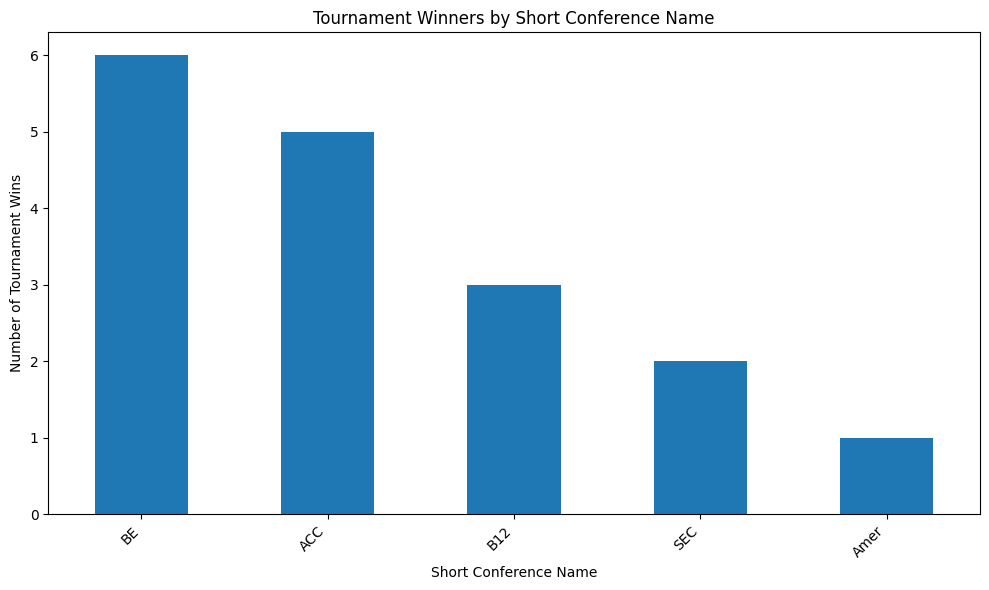

Chi-squared test statistic: 104.61586124987674
Degrees of freedom: 36
P-value: 1.2965089048060923e-08


In [35]:
from scipy.stats import chi2_contingency

winners = df[df["Tournament Winner?"] == "Yes"]

conference_wins = winners["Short Conference Name"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
conference_wins.plot(kind='bar')

plt.title("Tournament Winners by Short Conference Name")
plt.xlabel("Short Conference Name")
plt.ylabel("Number of Tournament Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

contingency_table = pd.crosstab(df["Short Conference Name"], df["Tournament Winner?"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

We reject the null hypothesis stating the conference you are in does not affect your chances of winning the tournament since the p-value is significantly below our signifance level of 0.05.

For our second test, we want to show that many of our smaller statistics are correlated with the more encompasing statistics like defensive efficiency and more general team performance. We will calculate a pearson correlation coefficient to show this. *Note*: A lower defensive efficiency indicates better defensive performance

**H0**: Average Height does not have an affect on defensive efficiency

**HA**: Average height does have an affect on defensive efficiency



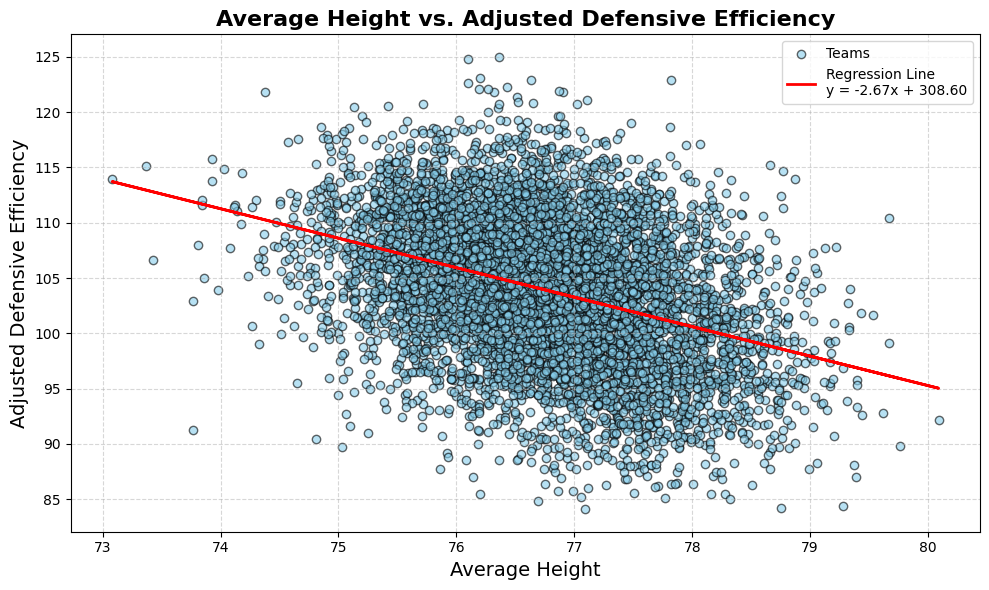

Pearson correlation coefficient: -0.37339219652587674
P-value: 1.3486656927857741e-217


In [36]:
from scipy.stats import pearsonr
df_clean = df[df["AvgHeight"].notna() & (df["AvgHeight"] != 0)].copy()

x = df_clean["AvgHeight"]
y = df_clean["Adjusted Defensive Efficiency"]

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label="Teams", color="skyblue", edgecolor="k")
plt.plot(x, regression_line, color="red", linewidth=2, label=f"Regression Line\ny = {slope:.2f}x + {intercept:.2f}")

plt.title("Average Height vs. Adjusted Defensive Efficiency", fontsize=16, weight='bold')
plt.xlabel("Average Height", fontsize=14)
plt.ylabel("Adjusted Defensive Efficiency", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

corr_coef, p_value = pearsonr(df_clean["AvgHeight"], df_clean["Adjusted Defensive Efficiency"])

print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

We reject the null hypothesis of average height not affecting defensive efficiency since our p-value is significantly lower than our significance level of 0.05.

*NOTE:* A lower defensive efficiency indicates better defensive performance


Similar to above, we are trying to show how smaller statistics are associated with the more encompasing stats like offensive efficiency in this case

**H0**: Three point percentage does not have an affect on offensive efficiency.

**HA**: Three point percentage does have an affect on offensive efficiency

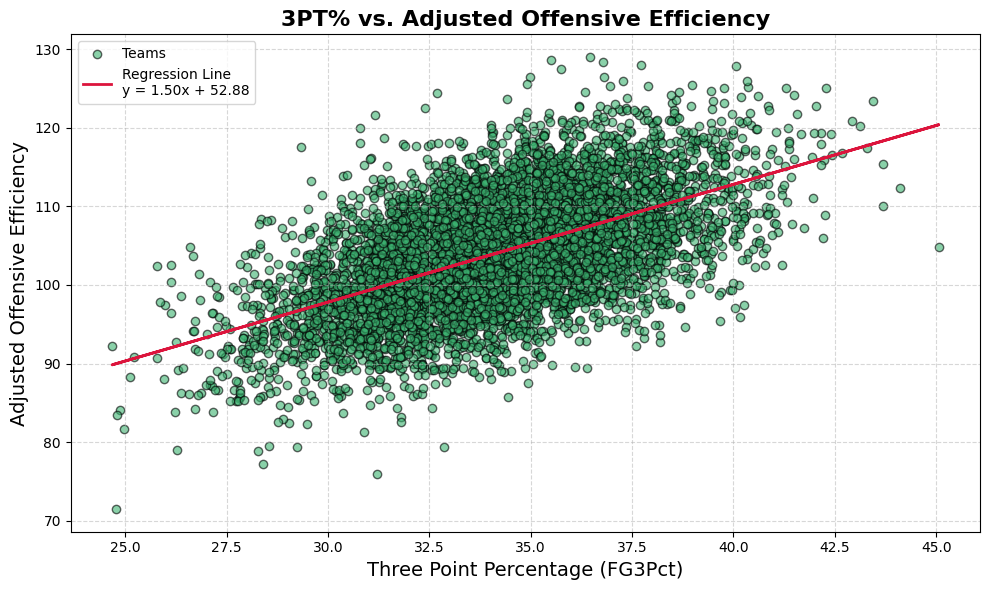

Pearson correlation coefficient: 0.5631922600891128
P-value: 0.0


In [37]:
df_clean = df[
    df["FG3Pct"].notna() & (df["FG3Pct"] != 0) &
    df["Adjusted Offensive Efficiency"].notna()
].copy()

x = df_clean["FG3Pct"]
y = df_clean["Adjusted Offensive Efficiency"]

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color="mediumseagreen", edgecolor="k", label="Teams")
plt.plot(x, regression_line, color="crimson", linewidth=2, label=f"Regression Line\ny = {slope:.2f}x + {intercept:.2f}")

plt.title("3PT% vs. Adjusted Offensive Efficiency", fontsize=16, weight='bold')
plt.xlabel("Three Point Percentage (FG3Pct)", fontsize=14)
plt.ylabel("Adjusted Offensive Efficiency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

corr_coef, p_value = pearsonr(x, y)

print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

Seems like the p-value went below the lowest float value python can represent (non-negative). Therefore it is pretty easy to reject our null hypothesis that three point precentage does not effect offensive efficiency since it is below our significance level of 0.05.

## Primary Analysis

For our primary analysis, we switch to using NET ranking, which is one of the NCAA's offical ways to rank teams. The formula is not public information, however it takes many metrics into account, like offensive efficiency, defensive efficiency, strength of schedule, etc. [Here](https://www.ncaa.com/news/basketball-men/article/2022-12-05/college-basketballs-net-rankings-explained) is some reading about NET ranking. We use this because it takes many of the factors we wanted to use into account to represent a team's overall performance.

Our machine learning method will be [logarithmic regresssion](https://www.geeksforgeeks.org/understanding-logistic-regression/) which is used for classification, between 0 and 1 as we do here to represent whether a team made a certain round or not.

[Log regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Below, we create 4 different Y sets which are the results of each team. Our X is the NET ranking of these teams, which we then scale. We split these sets into training and testing sets using predetermined random state and test size.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


random_state = 42
test_size = 0.2

X = df[['Net Rating']]
Y_tournament_winner = df.loc[X.index, 'Tournament Winner Binary']
Y_final_four = df.loc[X.index, 'Final Four Binary']
Y_tournament_championship = df.loc[X.index, 'Tournament Championship Binary']
Y_tournament = df.loc[X.index, 'Made Tournament Binary']

# Standardize Net Rating 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# Split Data Accordingly
X_train_tw, X_test_tw, Y_train_tw, Y_test_tw = train_test_split(X_scaled, Y_tournament_winner, test_size = test_size, random_state = random_state)
X_train_ff, X_test_ff, Y_train_ff, Y_test_ff = train_test_split(X_scaled, Y_final_four, test_size = test_size, random_state = random_state)
X_train_tc, X_test_tc, Y_train_tc, Y_test_tc = train_test_split(X_scaled, Y_tournament_championship, test_size = test_size, random_state = random_state)
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(X_scaled, Y_tournament, test_size = test_size, random_state = random_state)

Next, we will create models for each set and train them based on the data we split above.

In [39]:
from sklearn.linear_model import LogisticRegression

# Function to fit the model
def fit_model(X_train, Y_train):
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted model
def predict_data(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# Fit the model for tournament winner
log_model_tw = fit_model(X_train_tw, Y_train_tw)
Y_train_pred_tw, Y_test_pred_tw = predict_data(log_model_tw, X_train_tw, X_test_tw)

# Fit the model for championship appearance
log_model_tc = fit_model(X_train_tc, Y_train_tc)
Y_train_pred_tc, Y_test_pred_tc = predict_data(log_model_tc, X_train_tc, X_test_tc)

# Fit the model for final four
log_model_ff = fit_model(X_train_ff, Y_train_ff)
Y_train_pred_ff, Y_test_pred_ff = predict_data(log_model_ff, X_train_ff, X_test_ff)

# Fit the model for tournament made
log_model_t = fit_model(X_train_t, Y_train_t)
Y_train_pred_t, Y_test_pred_t = predict_data(log_model_t, X_train_t, X_test_t)

## Visualization

Here we simply print out reports from each model and then visually represent

In [40]:
from sklearn.metrics import classification_report, accuracy_score

print("Tournament Made:\n")
print("   Train Accuracy:", accuracy_score(Y_train_t, Y_train_pred_t))
print("   Test Accuracy:", accuracy_score(Y_test_t, Y_test_pred_t))
print("\n   Classification Report:\n", classification_report(Y_test_t, Y_test_pred_t))
print("\n \n")

print("Final Four:\n")
print("   Train Accuracy:", accuracy_score(Y_train_ff, Y_train_pred_ff))
print("   Test Accuracy:", accuracy_score(Y_test_ff, Y_test_pred_ff))
print("\n   Classification Report:\n", classification_report(Y_test_ff, Y_test_pred_ff))
print("\n \n")

print("Championship Appearance:\n")
print("   Train Accuracy:", accuracy_score(Y_train_tc, Y_train_pred_tc))
print("   Test Accuracy:", accuracy_score(Y_test_tc, Y_test_pred_tc))
print("\n   Classification Report:\n", classification_report(Y_test_tc, Y_test_pred_tc))
print("\n \n")

print("Tournament Winner:\n")
print("   Train Accuracy:", accuracy_score(Y_train_tw, Y_train_pred_tw))
print("   Test Accuracy:", accuracy_score(Y_test_tw, Y_test_pred_tw))
print("\n   Classification Report:\n", classification_report(Y_test_tw, Y_test_pred_tw))
print("\n \n")

Tournament Made:

   Train Accuracy: 0.7944066515495087
   Test Accuracy: 0.781557067271353

   Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       856
           1       0.66      0.77      0.71       467

    accuracy                           0.78      1323
   macro avg       0.76      0.78      0.77      1323
weighted avg       0.79      0.78      0.78      1323


 

Final Four:

   Train Accuracy: 0.9132653061224489
   Test Accuracy: 0.8987150415721844

   Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      1307
           1       0.11      1.00      0.19        16

    accuracy                           0.90      1323
   macro avg       0.55      0.95      0.57      1323
weighted avg       0.99      0.90      0.94      1323


 

Championship Appearance:

   Train Accuracy: 0.9319727891156463
   Test Accuracy: 0.9191232048374905



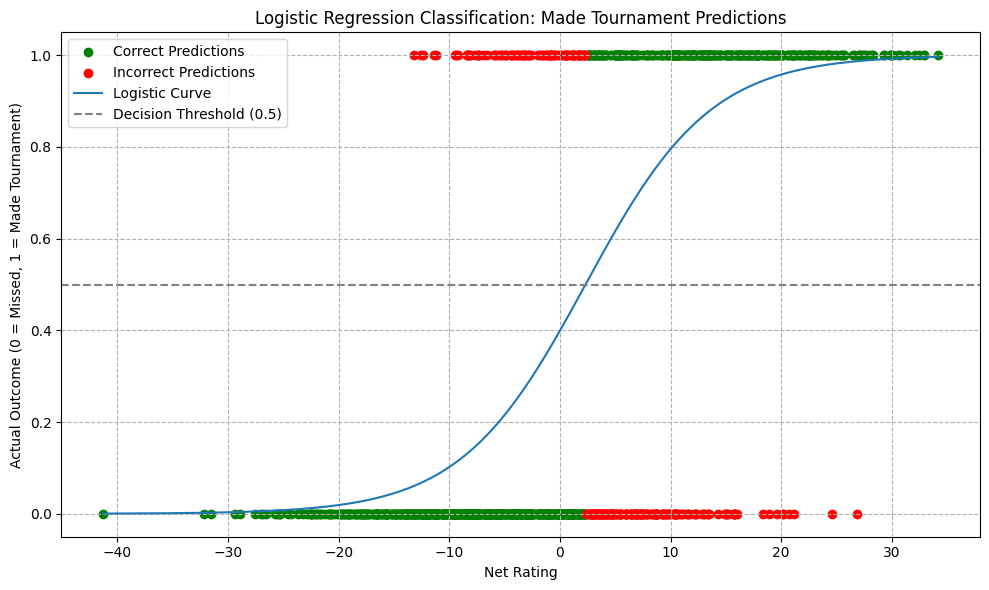

In [41]:
X_test_unscaled = scaler.inverse_transform(X_test_t)

correct = Y_test_t == Y_test_pred_t
incorrect = ~correct

plt.figure(figsize=(10, 6))

# Plot correct and incorrect predictions
plt.scatter(X_test_unscaled[correct], Y_test_t[correct], color='green', label='Correct Predictions')
plt.scatter(X_test_unscaled[incorrect], Y_test_t[incorrect], color='red', label='Incorrect Predictions')

# Plot logistic regression probability curve
x_vals = np.linspace(X_test_t.min(), X_test_t.max(), 500).reshape(-1, 1)
y_probs = log_model_t.predict_proba(x_vals)[:, 1]
plt.plot(scaler.inverse_transform(x_vals), y_probs, label='Logistic Curve')

plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Logistic Regression Classification: Made Tournament Predictions")
plt.xlabel("Net Rating")
plt.ylabel("Actual Outcome (0 = Missed, 1 = Made Tournament)")
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

Analysis for Tournament Made: If you look at the train and test accuracy above, you can see that both numbers are just under 80% accuracy, which shows fairly accurate predictions with no major overfitting. The model is a little worse when it comes to correctly predicting teams that made the tournament, having 66% precision and 77% recall. It is stronger at identifying teams that did not make the tournament, having higher precision and recall there. In conclusion, overall this is a solid model and the recall and f1 scores suggest that it could be used in real world scenarios, such as when you are predicting whether a "bubble team" (a team that is a borderline tournament team) should make it. 

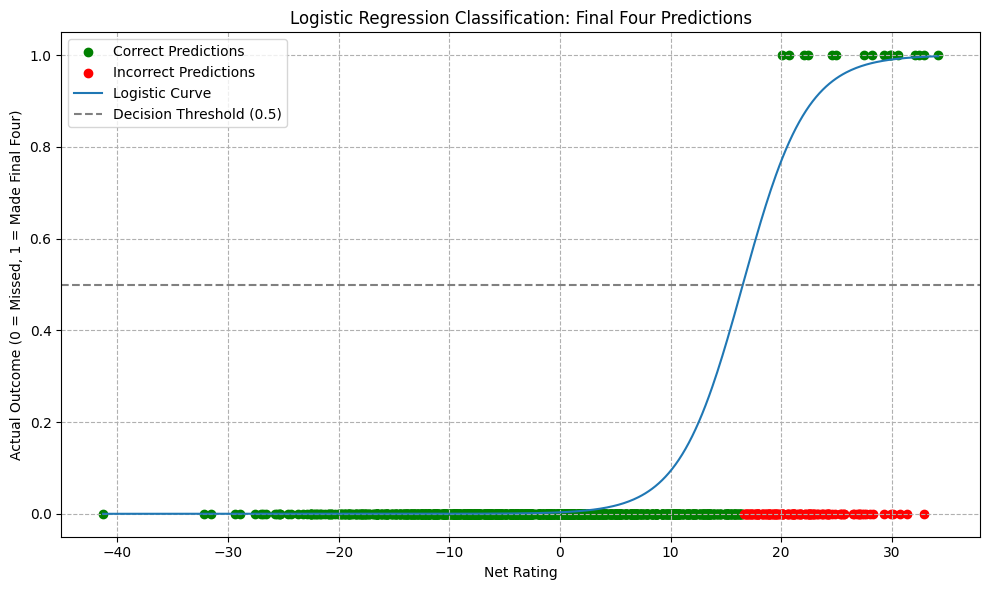

In [42]:
X_test_unscaled = scaler.inverse_transform(X_test_ff)

correct = Y_test_ff == Y_test_pred_ff
incorrect = ~correct

plt.figure(figsize=(10, 6))

# Plot correct and incorrect predictions
plt.scatter(X_test_unscaled[correct], Y_test_ff[correct], color='green', label='Correct Predictions')
plt.scatter(X_test_unscaled[incorrect], Y_test_ff[incorrect], color='red', label='Incorrect Predictions')

# Plot logistic regression probability curve
x_vals = np.linspace(X_test_ff.min(), X_test_ff.max(), 500).reshape(-1, 1)
y_probs = log_model_ff.predict_proba(x_vals)[:, 1]
plt.plot(scaler.inverse_transform(x_vals), y_probs, label='Logistic Curve')

plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Logistic Regression Classification: Final Four Predictions")
plt.xlabel("Net Rating")
plt.ylabel("Actual Outcome (0 = Missed, 1 = Made Final Four)")
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

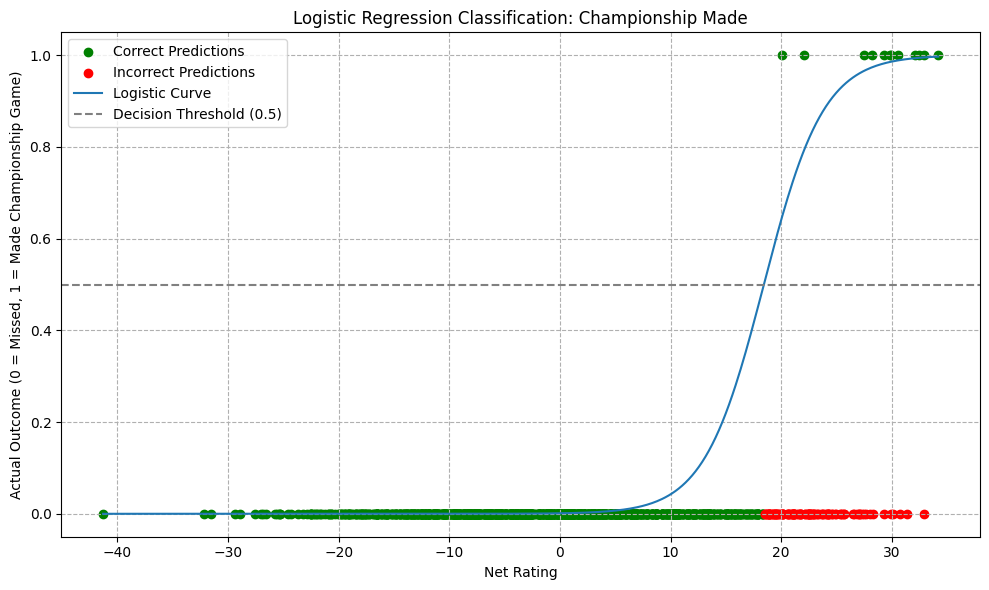

In [43]:
X_test_unscaled = scaler.inverse_transform(X_test_tc)

correct = Y_test_tc == Y_test_pred_tc
incorrect = ~correct


plt.figure(figsize=(10, 6))

# Plot correct and incorrect predictions
plt.scatter(X_test_unscaled[correct], Y_test_tc[correct], color='green', label='Correct Predictions')
plt.scatter(X_test_unscaled[incorrect], Y_test_tc[incorrect], color='red', label='Incorrect Predictions')

# Plot logistic regression probability curve
x_vals = np.linspace(X_test_tc.min(), X_test_tc.max(), 500).reshape(-1, 1)
y_probs = log_model_tc.predict_proba(x_vals)[:, 1]
plt.plot(scaler.inverse_transform(x_vals), y_probs, label='Logistic Curve')

plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Logistic Regression Classification: Championship Made")
plt.xlabel("Net Rating")
plt.ylabel("Actual Outcome (0 = Missed, 1 = Made Championship Game)")
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

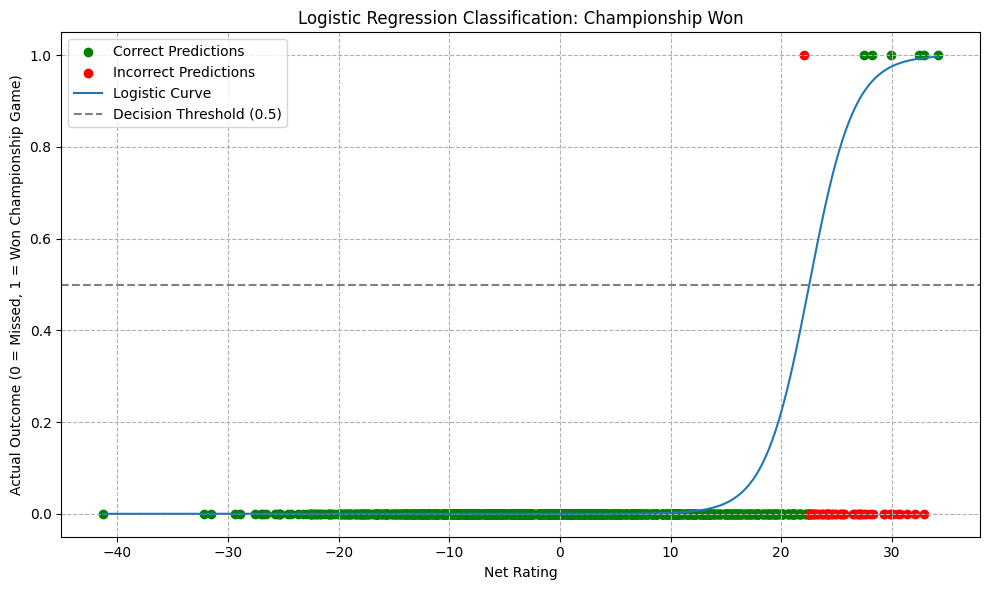

In [44]:
X_test_unscaled = scaler.inverse_transform(X_test_tw)

correct = Y_test_tw == Y_test_pred_tw
incorrect = ~correct

plt.figure(figsize=(10, 6))

# Plot correct and incorrect predictions
plt.scatter(X_test_unscaled[correct], Y_test_tw[correct], color='green', label='Correct Predictions')
plt.scatter(X_test_unscaled[incorrect], Y_test_tw[incorrect], color='red', label='Incorrect Predictions')

# Plot logistic regression probability curve
x_vals = np.linspace(X_test_tw.min(), X_test_tw.max(), 500).reshape(-1, 1)
y_probs = log_model_tw.predict_proba(x_vals)[:, 1]
plt.plot(scaler.inverse_transform(x_vals), y_probs, label='Logistic Curve')


plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title("Logistic Regression Classification: Championship Won")
plt.xlabel("Net Rating")
plt.ylabel("Actual Outcome (0 = Missed, 1 = Won Championship Game)")
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

Analysis for Final Four, Championship Made, Championship Won: One thing that becomes very clear about the model here is that it is very good at predicting who misses the final four and on, but not so great at predicting who makes it/the championship. This is reflected in the very low precision the model has predicting final four teams. It essentially predicts that every team with a high net rating will make it to the final four. Still, this model is effective at least at predicting the teams in the tournament that won't make it, and it has no false negatives when it comes to the final four teams it did predict. This is still of use to people because if you are filling out a March Madness bracket, it is good to have a pool of teams to select from that you think will make the Final Four that you KNOW will make it. Also it is worth noting this prediction is meant to be very difficult. No one is able to correctly predict a March Madness bracket, that is why there have never been perfect March Madness brackets. So it is important to take these low precision numbers with a grain of salt.

## Insights and Conclusions

1. Tournament Qualification Model Performs Best
Precision (0.66) and Recall (0.77) are both strong, indicating the model can reasonably identify true qualifiers without overpredicting.
Balanced F1-score (0.71) shows a healthy tradeoff between identifying true positives and avoiding false alarms.

2. Later Rounds: High Recall, Low Precision
For Final Four, Championship Appearance, and Winner models:
Recall = 1.00 (or very close): The model captures all real successes.
Precision ≈ 0.10–0.11: But it predicts way too many teams as successful.
F1-scores ≈ 0.18–0.19: The imbalance leads to a poor overall score.
This reflects overcompensation for class imbalance — the model is predicting “yes” for almost everyone in class 1 to ensure it doesn't miss anyone, but at the cost of precision.

What’s Happening:
Classes like Final Four, Championship, and Winner are very rare (≤ 1% of data).
Logistic regression, without adjustment, prefers predicting the dominant class.
Even with class_weight='balanced', it often overcorrects and causes false positives. However, this is because of how difficult it is to predict teams to make it this far, so being able to identify a group of teams who are capable of making it is sufficient.

Conclusion: The tournament prediction model is most useful overall, while the other models were useful to choose a group of Final Four and national championship CALIBER teams.